# BART

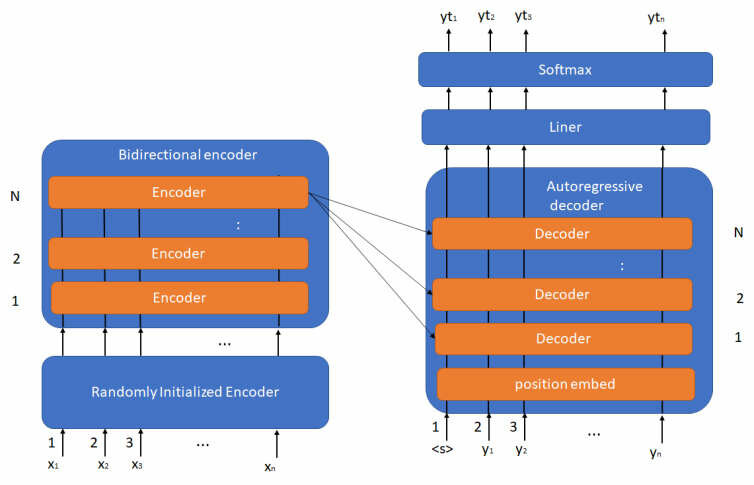

In [ ]:
!pip install transformers -q
!pip install torchinfo -q

In [ ]:
from transformers import AutoTokenizer, BartModel,BartConfig

# Initializing a BART facebook/bart-large style configuration weights
model = BartModel.from_pretrained("facebook/bart-base")

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")


In [ ]:
TEXT = (
    "PG&E stated it scheduled the blackouts in response to forecasts for high winds "
    "amid dry conditions. The aim is to reduce the risk of wildfires. Nearly 800 thousand customers were "
    "scheduled to be affected by the shutoffs which were expected to last through at least midday tomorrow."
)
inputs = tokenizer([TEXT], max_length=1024, return_tensors="pt")



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
from torchinfo import summary
from transformers import AutoModelForSequenceClassification, AutoTokenizer
summary(model, input_size=(1, 512), dtypes=['torch.IntTensor'])

Layer (type:depth-idx)                             Output Shape              Param #
BartModel                                          [1, 512, 768]             --
├─BartEncoder: 1-1                                 [1, 512, 768]             --
│    └─Embedding: 2-1                              [1, 512, 768]             38,603,520
│    └─BartLearnedPositionalEmbedding: 2-2         [1, 512, 768]             787,968
│    └─LayerNorm: 2-3                              [1, 512, 768]             1,536
│    └─ModuleList: 2-4                             --                        --
│    │    └─BartEncoderLayer: 3-1                  [1, 512, 768]             7,087,872
│    │    └─BartEncoderLayer: 3-2                  [1, 512, 768]             7,087,872
│    │    └─BartEncoderLayer: 3-3                  [1, 512, 768]             7,087,872
│    │    └─BartEncoderLayer: 3-4                  [1, 512, 768]             7,087,872
│    │    └─BartEncoderLayer: 3-5                  [1, 512, 768]       

In [ ]:
from transformers import AutoTokenizer, BertModel
model = BertModel.from_pretrained("bert-base-uncased")
from transformers import AutoModelForSequenceClassification, AutoTokenizer
summary(model, input_size=(1, 512), dtypes=['torch.IntTensor'])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Layer (type:depth-idx)                             Output Shape              Param #
BertModel                                          [1, 768]                  --
├─BertEmbeddings: 1-1                              [1, 512, 768]             --
│    └─Embedding: 2-1                              [1, 512, 768]             23,440,896
│    └─Embedding: 2-2                              [1, 512, 768]             1,536
│    └─Embedding: 2-3                              [1, 512, 768]             393,216
│    └─LayerNorm: 2-4                              [1, 512, 768]             1,536
│    └─Dropout: 2-5                                [1, 512, 768]             --
├─BertEncoder: 1-2                                 [1, 512, 768]             --
│    └─ModuleList: 2-6                             --                        --
│    │    └─BertLayer: 3-1                         [1, 512, 768]             7,087,872
│    │    └─BertLayer: 3-2                         [1, 512, 768]             7,087,872
│ 

In [ ]:
print(tokenizer)

BartTokenizerFast(name_or_path='facebook/bart-large-cnn', vocab_size=50265, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)})


In [ ]:
!pip install torchinfo -q

In [ ]:
print(inputs.keys())

dict_keys(['input_ids', 'attention_mask'])


In [ ]:
print(inputs['input_ids'].shape)
print(inputs['attention_mask'].shape)

torch.Size([1, 56])
torch.Size([1, 56])


In [ ]:
outputs = model(**inputs,return_dict=True)

In [ ]:
print(outputs.keys())

odict_keys(['last_hidden_state', 'past_key_values', 'encoder_last_hidden_state'])


In [ ]:
print("last hidden state",outputs.last_hidden_state.shape)


last hidden state torch.Size([1, 56, 768])


In [ ]:
print("past key",len(outputs.past_key_values))
print(outputs.past_key_values[0][0])

past key 6
tensor([[[[-0.1147, -0.5220, -0.6727,  ...,  0.3431,  0.0759, -0.0243],
          [ 0.0545,  0.3640, -0.7171,  ...,  0.0815,  0.0054,  0.3421],
          [ 0.8442, -0.6637, -0.3072,  ..., -0.5735, -0.6820,  0.8552],
          ...,
          [-1.2454,  0.7658,  1.5817,  ..., -0.3995, -0.1713, -0.0848],
          [-2.0342,  0.7014,  0.6181,  ...,  0.0440, -0.1218,  1.0048],
          [-1.6544,  0.4801, -0.3073,  ..., -0.2715, -0.1649, -0.2765]],

         [[ 0.4247, -0.3899, -0.3139,  ...,  0.5761,  0.1789,  1.3113],
          [ 0.2842, -0.3870, -0.3964,  ...,  0.5646,  0.0862,  1.3079],
          [-0.8362,  0.2443,  0.4941,  ...,  0.7270,  0.3747, -2.9863],
          ...,
          [ 0.3557, -1.5609, -2.4382,  ...,  0.9765,  1.8773, -2.5829],
          [-0.4403, -2.1208, -0.7422,  ...,  1.4561,  0.9696, -2.9593],
          [ 0.8482, -2.7829, -0.3561,  ...,  1.0278, -1.6397, -1.5226]],

         [[ 0.2488, -0.7200,  0.5254,  ..., -0.1434, -0.5021,  0.6895],
          [ 0.3267,

In [ ]:
print("last encoder hidden state",outputs.encoder_last_hidden_state.shape)

last encoder hidden state torch.Size([1, 56, 768])


## Text Generation

### Summarization

In [ ]:
from transformers import AutoTokenizer, BartForConditionalGeneration

model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")

ARTICLE_TO_SUMMARIZE = (
    "PG&E stated it scheduled the blackouts in response to forecasts for high winds "
    "amid dry conditions. The aim is to reduce the risk of wildfires. Nearly 800 thousand customers were "
    "scheduled to be affected by the shutoffs which were expected to last through at least midday tomorrow."
)
inputs = tokenizer([ARTICLE_TO_SUMMARIZE], max_length=1024, return_tensors="pt")



KeyboardInterrupt: ignored

In [ ]:
# Generate Summary
summary_ids = model.generate(inputs["input_ids"], num_beams=2, min_length=0, max_length=20)
tokenizer.batch_decode(summary_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

'PG&E scheduled the blackouts in response to forecasts for high winds amid dry conditions'

### Next Word Prediction

### Masked Word Replacement

In [ ]:
from transformers import AutoTokenizer, BartForConditionalGeneration

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-base")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")

TXT = "My friends are <mask> but they eat too many carbs."
input_ids = tokenizer([TXT], return_tensors="pt")["input_ids"]
logits = model(input_ids).logits

masked_index = (input_ids[0] == tokenizer.mask_token_id).nonzero().item()
probs = logits[0, masked_index].softmax(dim=0)
values, predictions = probs.topk(5)

tokenizer.decode(predictions).split()

['not', 'good', 'healthy', 'great', 'very']

## Text Classification

In [ ]:
import torch
from transformers import AutoTokenizer, BartForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("valhalla/bart-large-sst2")
model = BartForSequenceClassification.from_pretrained("valhalla/bart-large-sst2")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]


You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


'POSITIVE'

### Question Answering

In [ ]:
from transformers import AutoTokenizer, BartForQuestionAnswering
import torch

tokenizer = AutoTokenizer.from_pretrained("valhalla/bart-large-finetuned-squadv1")
model = BartForQuestionAnswering.from_pretrained("valhalla/bart-large-finetuned-squadv1")

question, text = "Who was Jim Henson?", "Jim Henson was a nice puppet"

inputs = tokenizer(question, text, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

answer_start_index = outputs.start_logits.argmax()
answer_end_index = outputs.end_logits.argmax()

predict_answer_tokens = inputs.input_ids[0, answer_start_index : answer_end_index + 1]
tokenizer.decode(predict_answer_tokens, skip_special_tokens=True)

# target is "nice puppet"
target_start_index = torch.tensor([14])
target_end_index = torch.tensor([15])

outputs = model(**inputs, start_positions=target_start_index, end_positions=target_end_index)
loss = outputs.loss
round(loss.item(), 2)

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.


You passed along `num_labels=3` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'LABEL_0', '1': 'LABEL_1'}. The number of labels wil be overwritten to 2.


0.59

### Other

In [ ]:
from transformers import AutoTokenizer, BartForCausalLM

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-base")
model = BartForCausalLM.from_pretrained("facebook/bart-base", add_cross_attention=False)
assert model.config.is_decoder, f"{model.__class__} has to be configured as a decoder."
inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

logits = outputs.logits
expected_shape = [1, inputs.input_ids.shape[-1], model.config.vocab_size]
list(logits.shape) == expected_shape

Some weights of the model checkpoint at facebook/bart-base were not used when initializing BartForCausalLM: ['encoder.layers.3.fc1.bias', 'encoder.layers.3.fc1.weight', 'encoder.layers.1.self_attn.v_proj.weight', 'encoder.layers.2.self_attn.q_proj.weight', 'shared.weight', 'encoder.layers.5.self_attn.v_proj.bias', 'encoder.layers.0.self_attn.v_proj.bias', 'encoder.layers.3.self_attn.out_proj.weight', 'encoder.layers.4.self_attn_layer_norm.bias', 'encoder.layers.5.self_attn.v_proj.weight', 'encoder.layers.1.self_attn.k_proj.bias', 'encoder.layers.1.self_attn.out_proj.bias', 'encoder.layers.3.self_attn.v_proj.bias', 'encoder.layers.0.self_attn.k_proj.weight', 'encoder.layers.5.self_attn.q_proj.weight', 'encoder.layers.1.fc1.weight', 'encoder.layers.0.self_attn.out_proj.bias', 'encoder.layers.1.self_attn.out_proj.weight', 'encoder.layers.4.self_attn.q_proj.weight', 'encoder.layers.5.fc1.weight', 'encoder.layers.2.self_attn.q_proj.bias', 'encoder.embed_tokens.weight', 'encoder.layers.2.fc1

True